# define parameters

### Calculate the molecular length

In [3]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


In [38]:
from scipy.constants import micro

# define parameters
photosensitizer_molar = 10*micro
photosensitizer_characteristics = {
    'formula': {
        'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}
light_characteristics = {
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}

# A biofilm system without absorbance data

The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-6
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*0.000821795989141709*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 702.49688*so*fa;
  _J5: so + eps => o_eps + mo; 37.75*so*eps;
  _J6:  => fa; 3.8441e-5*fa;

  // Species initializations:
  ps = 3.16198905019855e-07;
  e_ps = 4.67730208078544e-06;
  mo = 0.000281032883187507;
  so = 2.211650

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:83: DeprecationWarning:

invalid escape sequence \.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,5.000000e-06,0.000000,0.000281,0.000000e+00,0.000000e+00,0.010976,0.000000,1130.004183,0.000000
180.753138,3.166089e-07,0.000005,0.000281,1.776530e-07,2.438963e-11,0.010807,0.000246,1128.635812,1.368371
361.506276,3.166073e-07,0.000005,0.000281,1.778072e-07,4.880032e-11,0.010639,0.000488,1127.267912,2.736270
542.259414,3.166058e-07,0.000005,0.000281,1.779617e-07,7.323209e-11,0.010474,0.000726,1125.900485,4.103698
723.012552,3.166043e-07,0.000005,0.000281,1.781164e-07,9.768497e-11,0.010311,0.000961,1124.533530,5.470653
...,...,...,...,...,...,...,...,...,...
42476.987448,3.162066e-07,0.000005,0.000281,2.203065e-07,6.377900e-09,0.000154,0.015323,822.971096,307.033086
42657.740586,3.162047e-07,0.000005,0.000281,2.205207e-07,6.408135e-09,0.000151,0.015327,821.734297,308.269886
42838.493724,3.162027e-07,0.000005,0.000281,2.207352e-07,6.438399e-09,0.000148,0.015331,820.498156,309.506026


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.022220,0.936673,0.009759,1.198413,0.022220,2.859770
0.100418,0.043820,0.936669,0.019460,1.198382,0.043820,2.869472
0.150628,0.064822,0.936664,0.029106,1.198351,0.064822,2.879117
0.200837,0.085250,0.936660,0.038697,1.198319,0.085250,2.888709
0.251046,0.105123,0.936655,0.048237,1.198288,0.105123,2.898248
...,...,...,...,...,...,...
11.799163,0.990057,0.935483,2.002463,1.190327,0.990057,4.852475
11.849372,0.990264,0.935477,2.011630,1.190288,0.990264,4.861642
11.899582,0.990468,0.935472,2.020808,1.190250,0.990468,4.870820


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

3.6 time (hr)
0.050209     2.859770
0.100418     2.869472
0.150628     2.879117
0.200837     2.888709
0.251046     2.898248
               ...   
11.799163    4.852475
11.849372    4.861642
11.899582    4.870820
11.949791    4.880009
12.000000    4.889209
Name: log10-inactivation, Length: 239, dtype: float64
hours to target: 4.418410041841004
hours to target: 4.418410041841004
The prediction of 4.418410041841004 is within the 4.5+/-2.2 tolerance of the actual value.
A -1.8133333333333335%-error
The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-6
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,1.000000e-05,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,6.332147e-07,0.000009,0.000281,3.553896e-07,9.753901e-11,1.056567e-02,0.000486,1127.269638,2.734545
361.506276,6.332085e-07,0.000009,0.000281,3.560070e-07,1.952464e-10,1.016950e-02,0.000954,1124.536980,5.467203
542.259414,6.332023e-07,0.000009,0.000281,3.566260e-07,2.931227e-10,9.787412e-03,0.001405,1121.806214,8.197968
723.012552,6.331961e-07,0.000009,0.000281,3.572467e-07,3.911683e-10,9.418939e-03,0.001840,1119.077347,10.926836
...,...,...,...,...,...,...,...,...,...
42476.987448,6.314016e-07,0.000009,0.000281,5.586349e-07,2.873069e-08,9.411042e-08,0.012879,552.957312,577.046871
42657.740586,6.313919e-07,0.000009,0.000281,5.598092e-07,2.888387e-08,8.827189e-08,0.012879,550.851352,579.152831
42838.493724,6.313822e-07,0.000009,0.000281,5.609864e-07,2.903736e-08,8.278300e-08,0.012879,548.749010,581.255173


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.043939,0.936669,0.019515,1.198382,0.043939,2.869526
0.100418,0.085747,0.936660,0.038934,1.198319,0.085747,2.888945
0.150628,0.125547,0.936650,0.058264,1.198257,0.125547,2.908275
0.200837,0.163455,0.936641,0.077511,1.198194,0.163455,2.927522
0.251046,0.199577,0.936632,0.096680,1.198131,0.199577,2.946692
...,...,...,...,...,...,...
11.799163,0.999993,0.933987,5.136251,1.180369,0.999993,7.986262
11.849372,0.999993,0.933972,5.164066,1.180275,0.999993,8.014078
11.899582,0.999994,0.933958,5.191947,1.180180,0.999994,8.041959


5 time (hr)
0.050209     2.869526
0.100418     2.888945
0.150628     2.908275
0.200837     2.927522
0.251046     2.946692
               ...   
11.799163    7.986262
11.849372    8.014078
11.899582    8.041959
11.949791    8.069904
12.000000    8.097914
Name: log10-inactivation, Length: 239, dtype: float64
hours to target: 5.623430962343096
hours to target: 5.623430962343096
The prediction of 5.623430962343096 is within the 4.5+/-2.2 tolerance of the actual value.
A 24.88888888888889%-error
The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-5
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,0.000020,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,0.000001,0.000019,0.000281,7.111108e-07,3.899992e-10,1.010024e-02,0.000949,1124.543875,5.460308
361.506276,0.000001,0.000019,0.000281,7.135808e-07,7.813442e-10,9.291085e-03,0.001826,1119.091140,10.913043
542.259414,0.000001,0.000019,0.000281,7.160640e-07,1.174042e-09,8.544063e-03,0.002635,1113.646025,16.358157
723.012552,0.000001,0.000019,0.000281,7.185606e-07,1.568100e-09,7.854618e-03,0.003381,1108.208577,21.795606
...,...,...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000019,0.000279,1.784144e-06,1.494292e-07,-1.398567e-14,0.011856,175.405426,954.598756
42657.740586,0.000001,0.000019,0.000279,1.790181e-06,1.504037e-07,1.531701e-14,0.011856,173.279417,956.724766
42838.493724,0.000001,0.000019,0.000279,1.796204e-06,1.513814e-07,3.296450e-14,0.011856,171.172125,958.832058


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.085919,0.936660,0.039015,1.198320,0.085919,2.889027
0.100418,0.164241,0.936641,0.077919,1.198194,0.164241,2.927930
0.150628,0.235695,0.936623,0.116733,1.198068,0.235695,2.966745
0.200837,0.300930,0.936604,0.155479,1.197941,0.300930,3.005491
0.251046,0.360523,0.936586,0.194175,1.197815,0.360523,3.044186
...,...,...,...,...,...,...
8.937238,1.000000,0.932025,9.785938,1.167652,1.000000,12.635950
8.987448,1.000000,0.931988,9.992183,1.167417,1.000000,12.842195
9.037657,1.000000,0.931951,10.257872,1.167180,1.000000,13.107883


6.3 time (hr)
0.050209     2.889027
0.100418     2.927930
0.150628     2.966745
0.200837     3.005491
0.251046     3.044186
              ...    
8.937238    12.635950
8.987448    12.842195
9.037657    13.107883
9.087866    13.456187
9.138075    14.036637
Name: log10-inactivation, Length: 182, dtype: float64
hours to target: 4.066945606694561
hours to target: 4.066945606694561
The prediction of 4.066945606694561 is within the 4.5+/-2.2 tolerance of the actual value.
A -9.622222222222222%-error


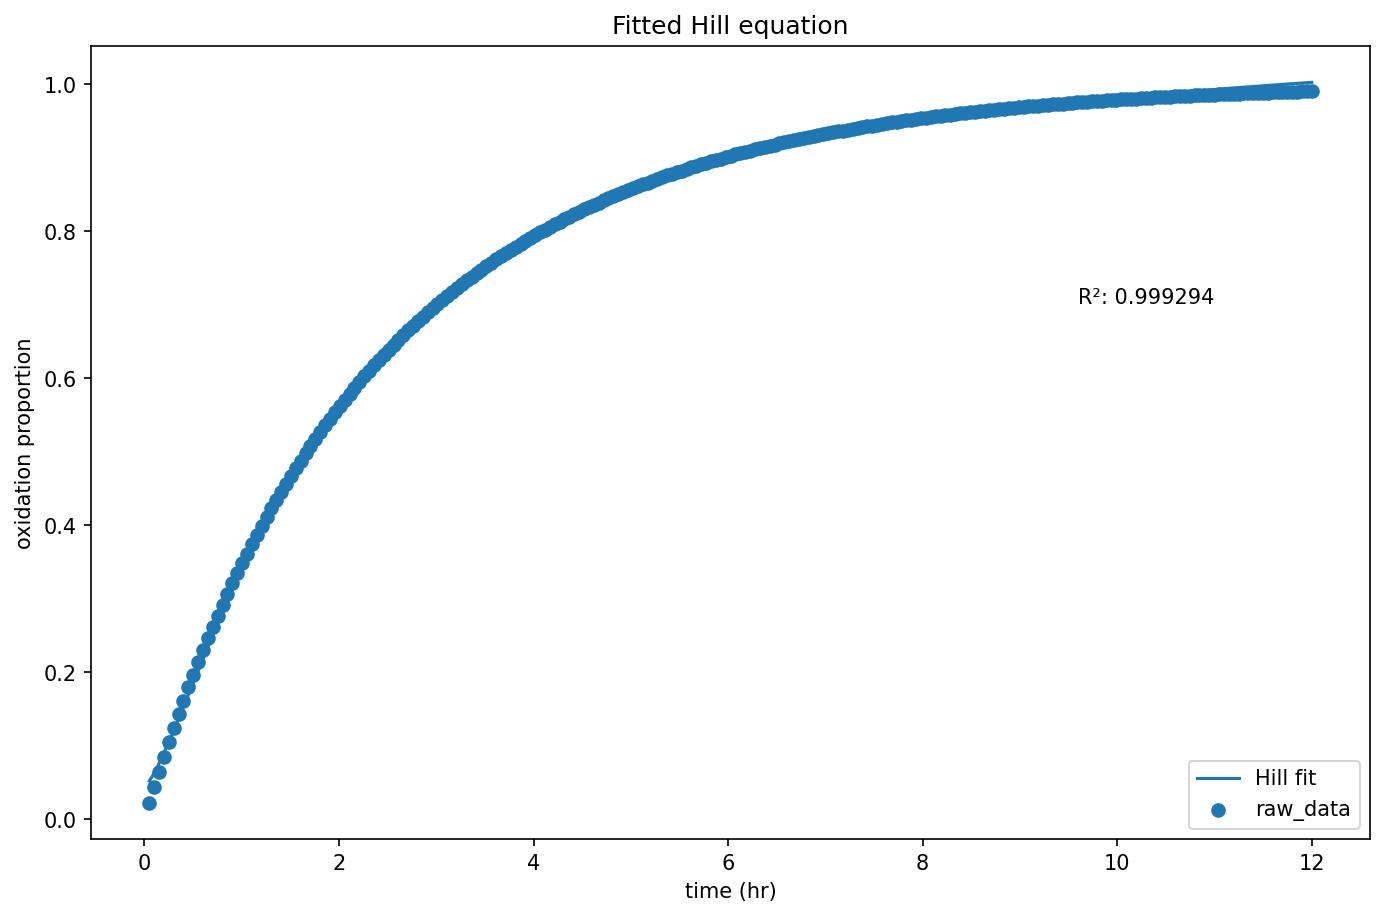

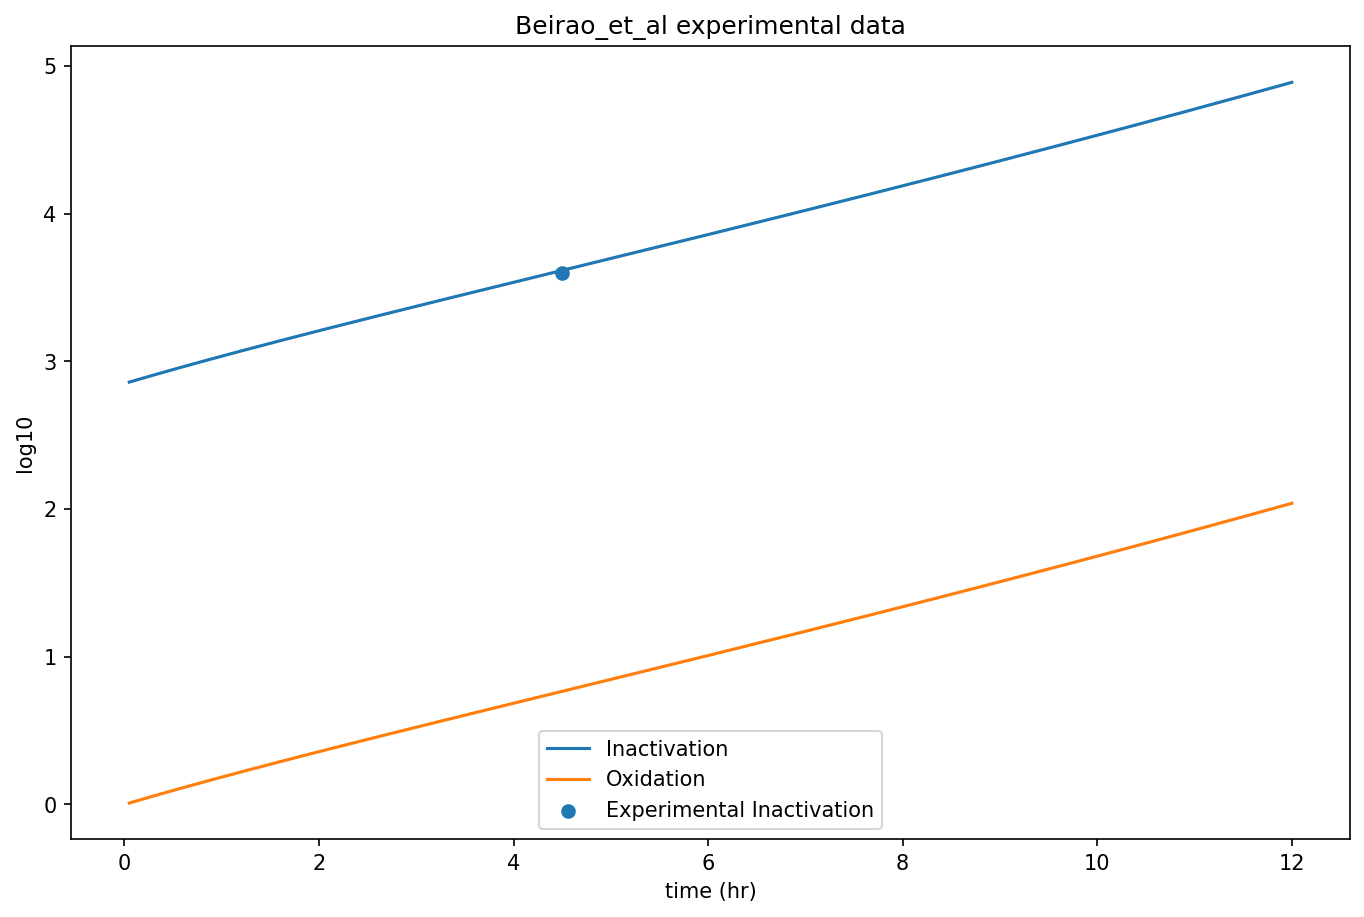

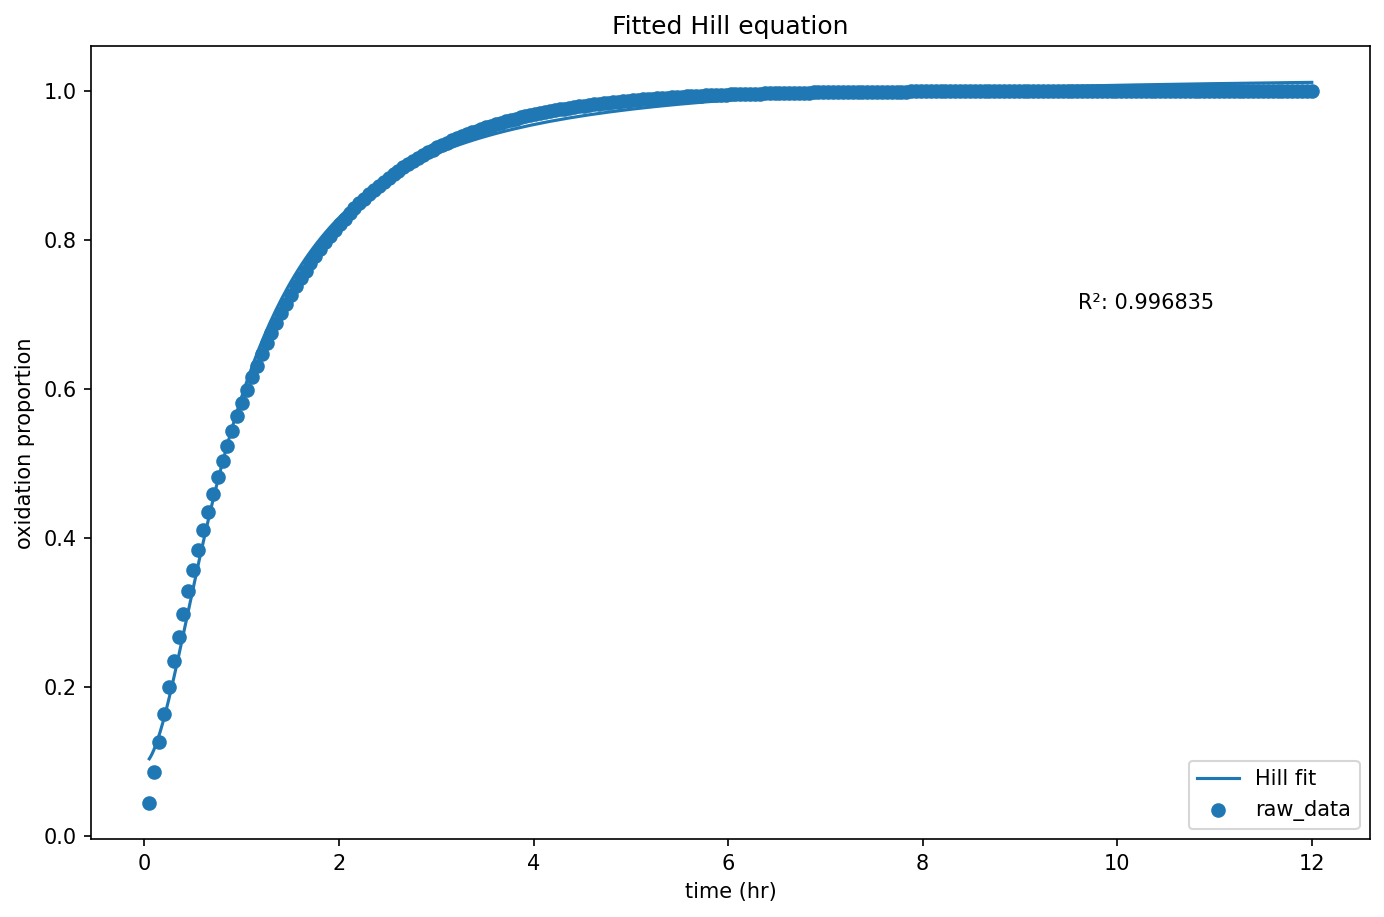

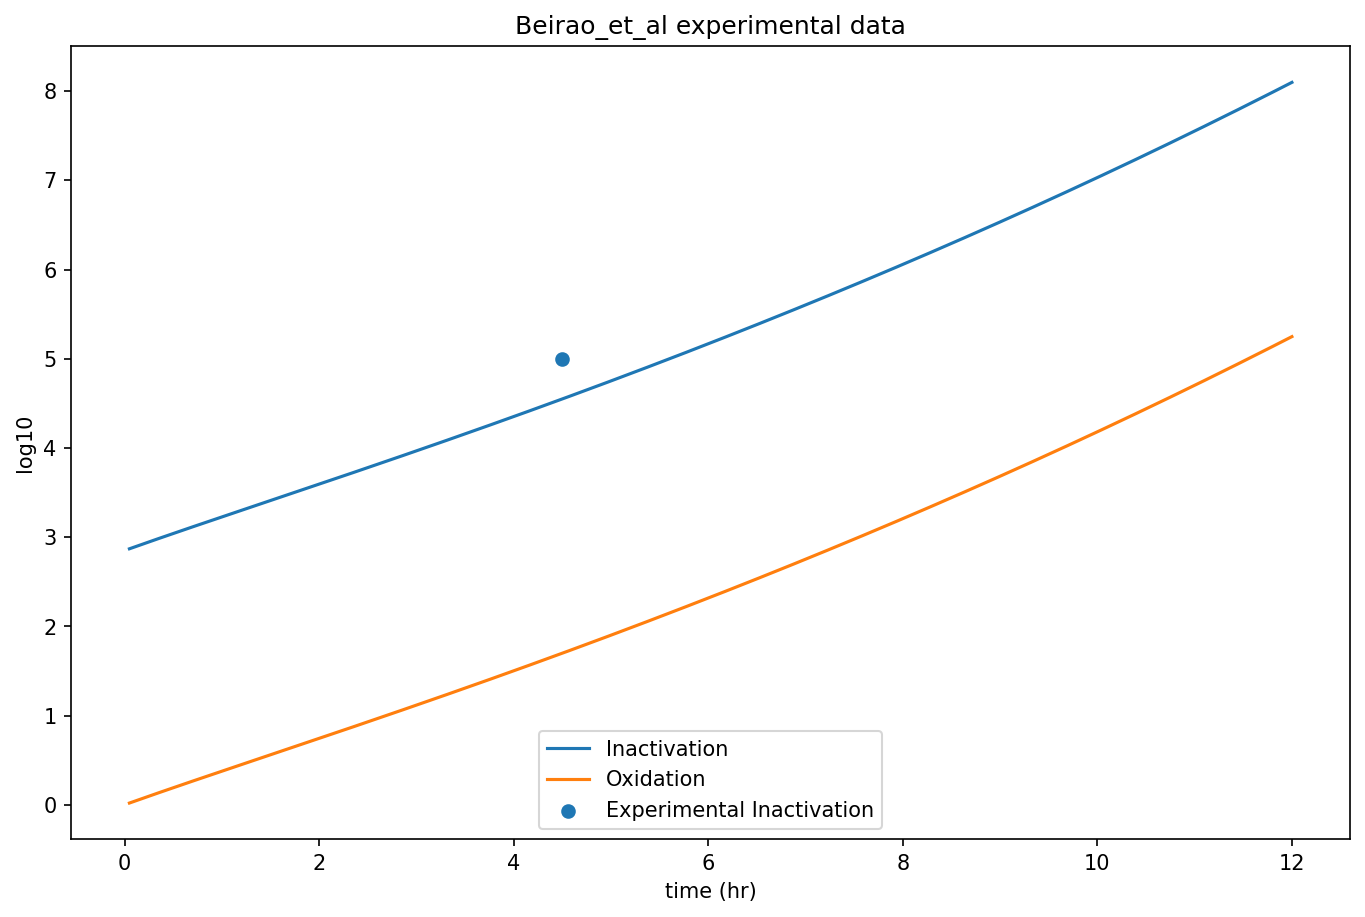

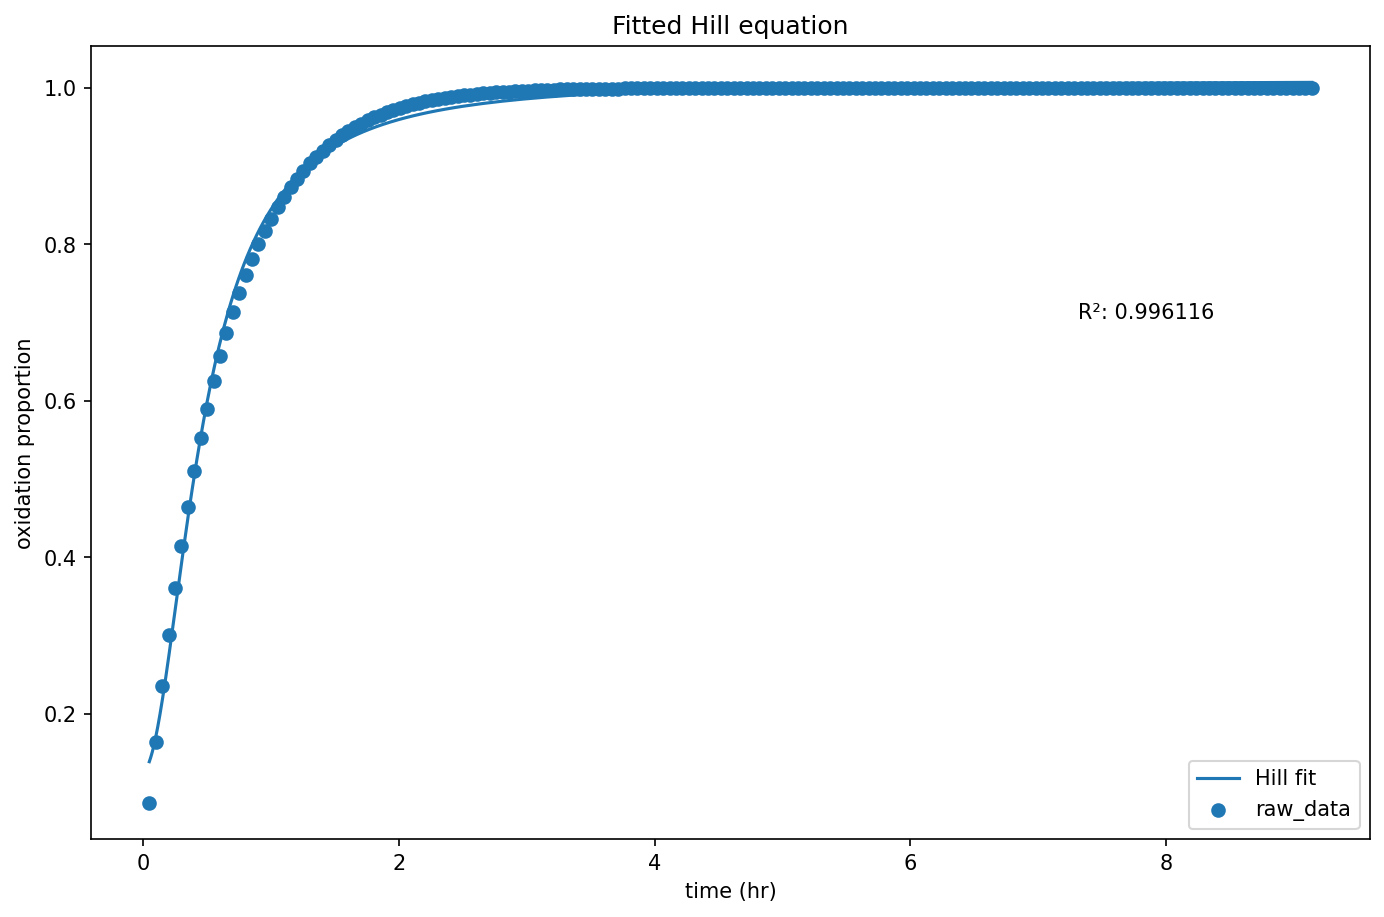

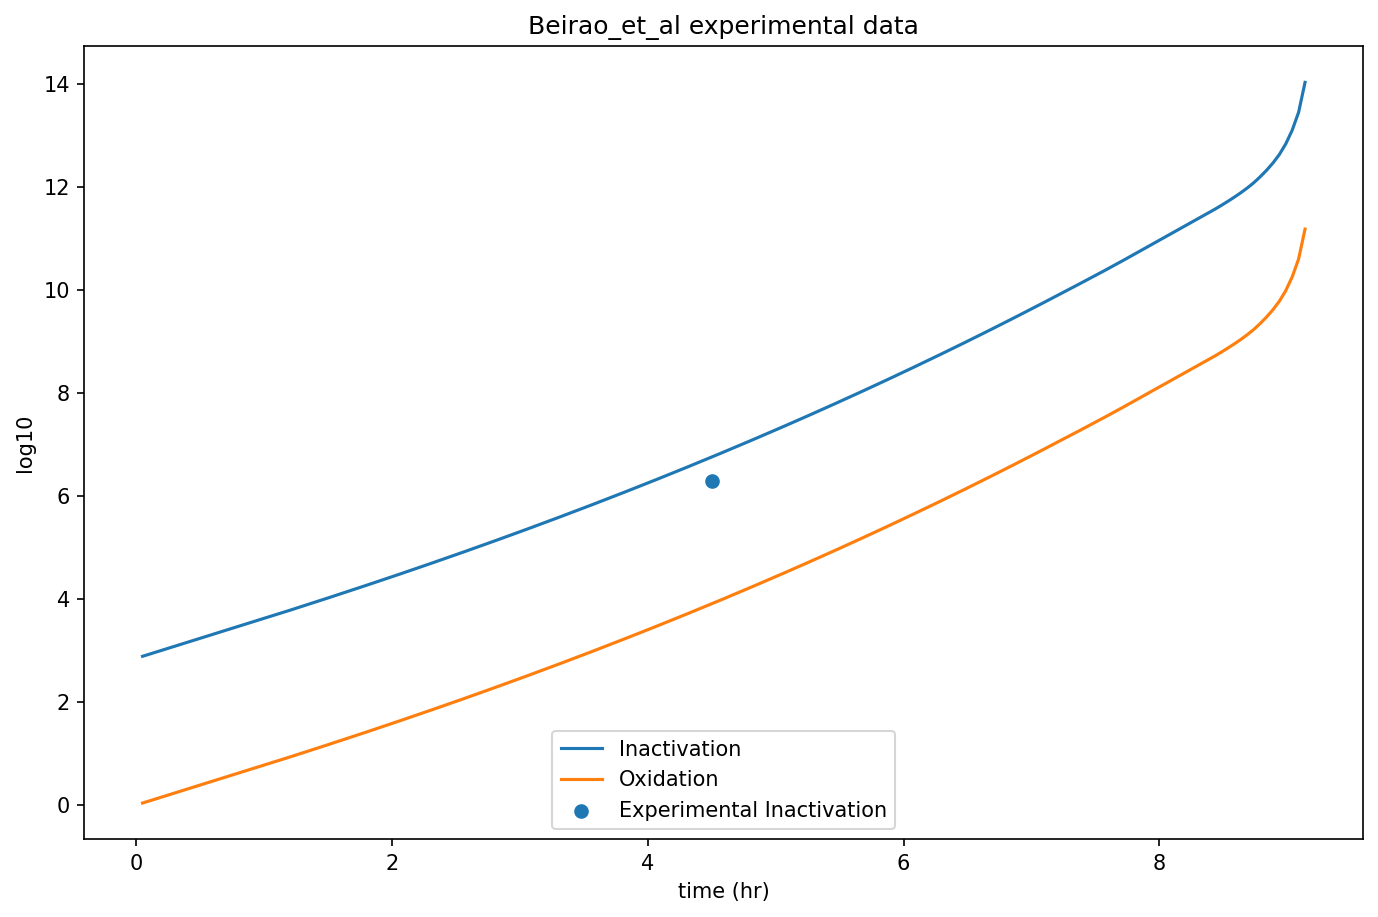

In [65]:
from uncertainties import ufloat
from math import isclose

# execute the simulation
%run ../../pdipy/pdi.py
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    # determine the experimental result
    actual_time = 4.5
    if photosensitizer_molar == 20*micro:
        actual_reduction = 6.3
    elif photosensitizer_molar == 5*micro:
        actual_reduction = 3.6
    elif photosensitizer_molar == 10*micro:
        actual_reduction = 5
        
    # execute the simulation
    pdi = PDI(verbose = True, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = photosensitizer_characteristics,
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = light_characteristics, 
        measurement = {'irradiance': 4}
    )
    pdi.simulate(
        export_name = 'sans Absorption data',
        figure_title = 'Beirao_et_al experimental data',
        display_fa_oxidation = True,
        experimental_data = {
            'x': [actual_time],
            'y': [actual_reduction]
        },
        export_contents = False
    )
    
    value, unit = pdi.parse_data(
        log_reduction = actual_reduction
    )            
    # calculate the %-error
    tolerance = actual_time/2
    acceptable_range_float = ufloat(actual_time, tolerance)
    if isclose(value, actual_time, abs_tol=tolerance):
        print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')
    else:
        print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')

# A biofilm system with absorbance data

photons per timestep:	2.7429539124364527e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*1*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 702.49688*so*fa;
  _J5: so + eps => o_eps + mo; 37.75*so*eps;
  _J6:  => fa; 3.8441e-5*fa;

  // Species initializations:
  ps = 2.77762941889371e-10;
  e_ps = 4.99971609374693e-06;
  mo = 0.000281020319062266;
  so = 2.4022206121194e-07;
  b_ps = 6.14331118425402e-12;
  fa = 8.91541987667883e-05;
  o_fa = 0.0150191396422059;
  eps = 797.987753611717;
  o_eps = 332.016429044393;

  // Other declarations:
  var oxidation;
end


Current integrator:
< roadrunner.Integrator()

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:83: DeprecationWarning:

invalid escape sequence \.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,5.000000e-06,0.000000,0.000281,0.000000e+00,0.000000e+00,0.010976,0.000000,1130.004183,0.000000
180.753138,2.777633e-10,0.000005,0.000281,1.896563e-07,2.284215e-14,0.010790,0.000262,1128.543463,1.460720
361.506276,2.777633e-10,0.000005,0.000281,1.898331e-07,4.570558e-14,0.010607,0.000520,1127.083272,2.920911
542.259414,2.777633e-10,0.000005,0.000281,1.900102e-07,6.859034e-14,0.010426,0.000773,1125.623611,4.380571
723.012552,2.777633e-10,0.000005,0.000281,1.901875e-07,9.149646e-14,0.010248,0.001023,1124.164482,5.839701
...,...,...,...,...,...,...,...,...,...
42476.987448,2.777629e-10,0.000005,0.000281,2.392120e-07,6.027772e-12,0.000098,0.015008,803.225910,326.778272
42657.740586,2.777629e-10,0.000005,0.000281,2.394639e-07,6.056611e-12,0.000096,0.015011,801.915228,328.088955
42838.493724,2.777629e-10,0.000005,0.000281,2.397162e-07,6.085481e-12,0.000093,0.015014,800.605307,329.398876


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.023703,0.999944,0.010418,4.255259,0.023703,2.860430
0.100418,0.046711,0.999944,0.020775,4.255224,0.046711,2.870787
0.150628,0.069050,0.999944,0.031074,4.255188,0.069050,2.881085
0.200837,0.090748,0.999944,0.041316,4.255152,0.090748,2.891327
0.251046,0.111828,0.999944,0.051503,4.255116,0.111828,2.901515
...,...,...,...,...,...,...
11.799163,0.993517,0.999943,2.188193,4.245972,0.993517,5.038204
11.849372,0.993667,0.999943,2.198393,4.245928,0.993667,5.048404
11.899582,0.993814,0.999943,2.208606,4.245884,0.993814,5.058618


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

3.6 time (hr)
0.050209     2.860430
0.100418     2.870787
0.150628     2.881085
0.200837     2.891327
0.251046     2.901515
               ...   
11.799163    5.038204
11.849372    5.048404
11.899582    5.058618
11.949791    5.068845
12.000000    5.079085
Name: log10-inactivation, Length: 239, dtype: float64
hours to target: 4.117154811715481
hours to target: 4.117154811715481
The prediction of 4.117154811715481 is within the 4.5+/-2.2 tolerance of the actual value.
A -8.511111111111111%-error
photons per timestep:	2.7429539124364527e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*1*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4:

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,1.000000e-05,0.00000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,5.555266e-10,0.00001,0.000281,3.794100e-07,9.134955e-14,1.053356e-02,0.000518,1127.085238,2.918944
361.506276,5.555266e-10,0.00001,0.000281,3.801177e-07,1.828694e-13,1.010765e-02,0.001015,1124.168413,5.835770
542.259414,5.555266e-10,0.00001,0.000281,3.808275e-07,2.745601e-13,9.698098e-03,0.001494,1121.253714,8.750469
723.012552,5.555265e-10,0.00001,0.000281,3.815393e-07,3.664220e-13,9.304297e-03,0.001953,1118.341148,11.663035
...,...,...,...,...,...,...,...,...,...
42476.987448,5.555250e-10,0.00001,0.000281,6.189944e-07,2.746281e-11,2.918132e-08,0.012740,519.254497,610.749685
42657.740586,5.555250e-10,0.00001,0.000281,6.204061e-07,2.761215e-11,2.716103e-08,0.012740,517.063476,612.940707
42838.493724,5.555250e-10,0.00001,0.000281,6.218215e-07,2.776184e-11,2.527596e-08,0.012740,514.876733,615.127449


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.046836,0.999944,0.020832,4.255224,0.046836,2.870844
0.100418,0.091271,0.999944,0.041566,4.255152,0.091271,2.891577
0.150628,0.133452,0.999944,0.062207,4.255081,0.133452,2.912219
0.200837,0.173514,0.999944,0.082764,4.255009,0.173514,2.932776
0.251046,0.211581,0.999944,0.103243,4.254937,0.211581,2.953254
...,...,...,...,...,...,...
11.799163,0.999998,0.999942,5.640065,4.234340,0.999998,8.490077
11.849372,0.999998,0.999942,5.671224,4.234229,0.999998,8.521235
11.899582,0.999998,0.999942,5.702462,4.234118,0.999998,8.552474


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

5 time (hr)
0.050209     2.870844
0.100418     2.891577
0.150628     2.912219
0.200837     2.932776
0.251046     2.953254
               ...   
11.799163    8.490077
11.849372    8.521235
11.899582    8.552474
11.949791    8.583789
12.000000    8.615186
Name: log10-inactivation, Length: 239, dtype: float64
hours to target: 5.2217573221757325
hours to target: 5.2217573221757325
The prediction of 5.2217573221757325 is within the 4.5+/-2.2 tolerance of the actual value.
A 16.044444444444444%-error
photons per timestep:	2.7429539124364527e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*1*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,2.000000e-05,0.00000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,1.111053e-09,0.00002,0.000281,7.592062e-07,3.652453e-13,1.003897e-02,0.001010,1124.176267,5.827916
361.506276,1.111053e-09,0.00002,0.000280,7.620384e-07,7.318518e-13,9.178288e-03,0.001938,1118.356857,11.647326
542.259414,1.111053e-09,0.00002,0.000280,7.648869e-07,1.099827e-12,8.388366e-03,0.002789,1112.546009,17.458174
723.012552,1.111053e-09,0.00002,0.000280,7.677519e-07,1.469180e-12,7.663646e-03,0.003569,1106.743780,23.260403
...,...,...,...,...,...,...,...,...,...
42476.987448,1.111045e-09,0.00002,0.000279,2.027213e-06,1.463752e-10,1.754964e-14,0.011796,142.270894,987.733289
42657.740586,1.111045e-09,0.00002,0.000279,2.033984e-06,1.473539e-10,2.458563e-14,0.011796,140.313233,989.690950
42838.493724,1.111045e-09,0.00002,0.000279,2.040729e-06,1.483359e-10,3.135712e-14,0.011796,138.376129,991.628054


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.091446,0.999944,0.041649,4.255152,0.091446,2.891661
0.100418,0.174326,0.999944,0.083191,4.255009,0.174326,2.933203
0.150628,0.249504,0.999944,0.124652,4.254866,0.249504,2.974663
0.200837,0.317746,0.999944,0.166054,4.254721,0.317746,3.016065
0.251046,0.379729,0.999944,0.207418,4.254577,0.379729,3.057430
...,...,...,...,...,...,...
8.585774,1.000000,0.999940,9.963497,4.221169,1.000000,12.813508
8.635983,1.000000,0.999940,10.143695,4.220894,1.000000,12.993706
8.686192,1.000000,0.999940,10.369996,4.220619,1.000000,13.220008


6.3 time (hr)
0.050209     2.891661
0.100418     2.933203
0.150628     2.974663
0.200837     3.016065
0.251046     3.057430
              ...    
8.585774    12.813508
8.635983    12.993706
8.686192    13.220008
8.736402    13.467128
8.786611    14.035209
Name: log10-inactivation, Length: 175, dtype: float64
hours to target: 3.8158995815899583
hours to target: 3.8158995815899583
The prediction of 3.8158995815899583 is within the 4.5+/-2.2 tolerance of the actual value.
A -15.200000000000003%-error


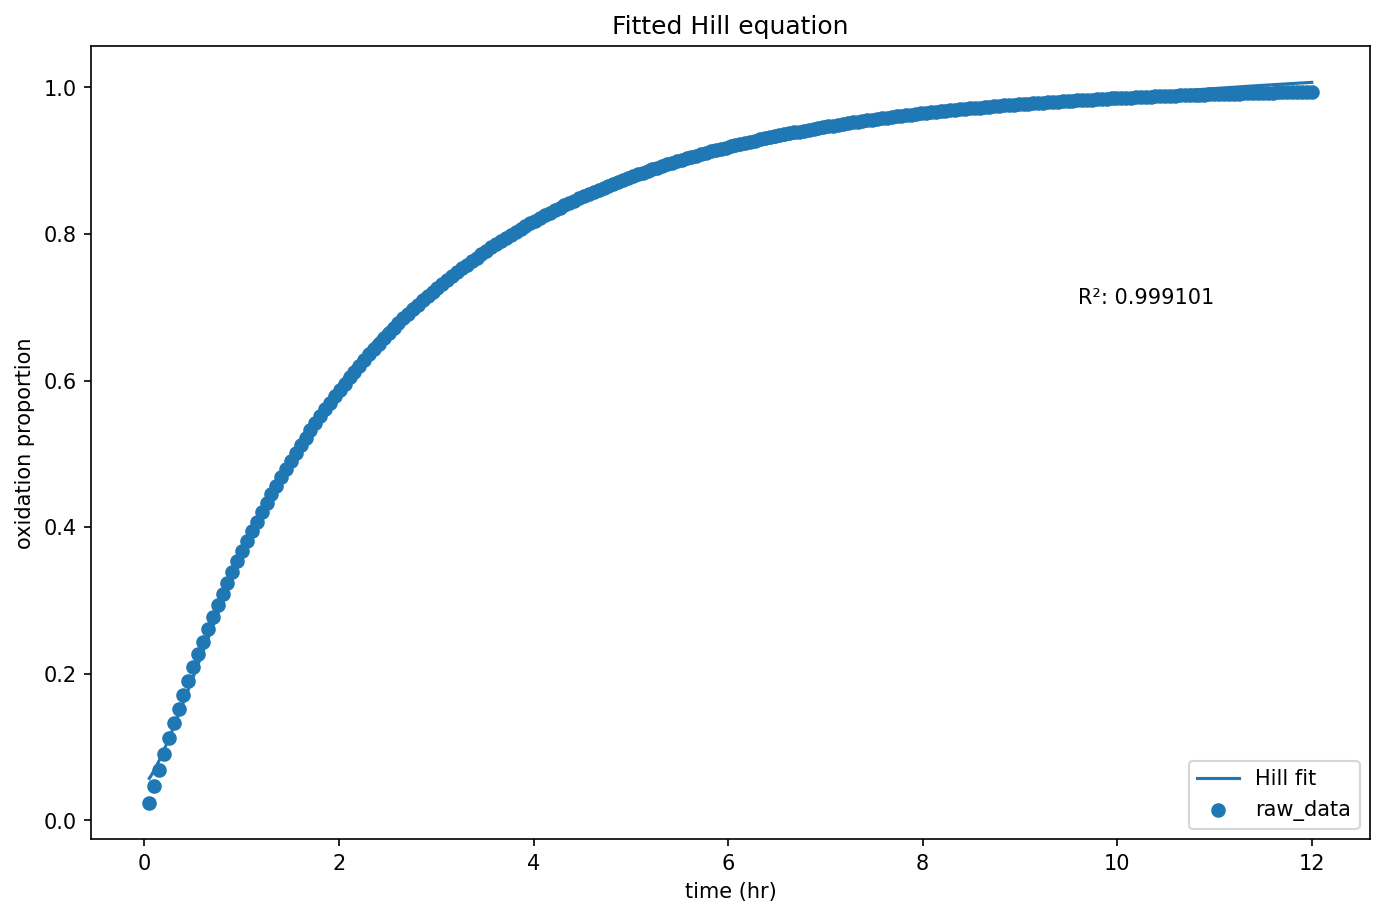

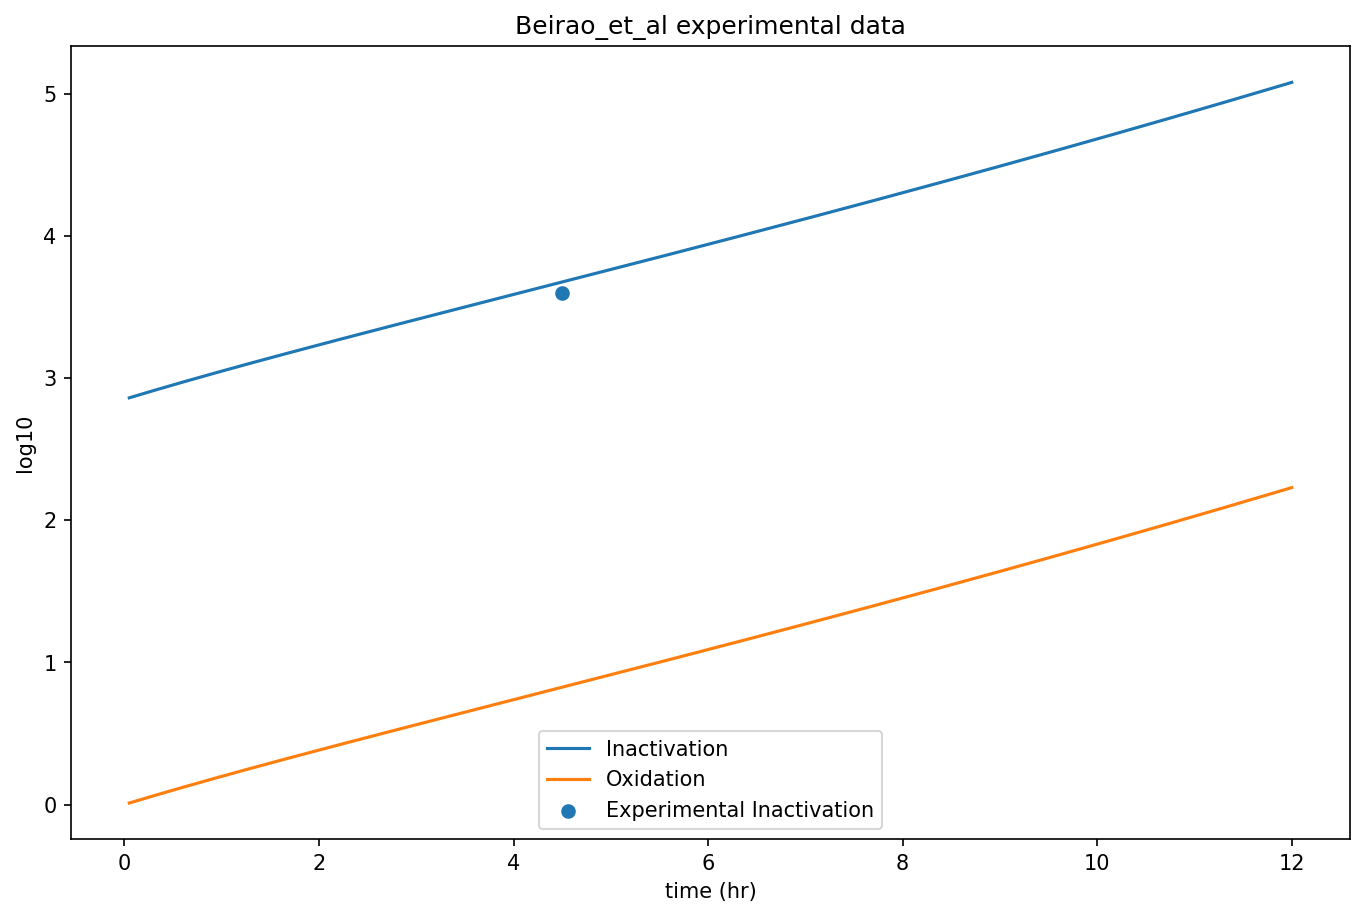

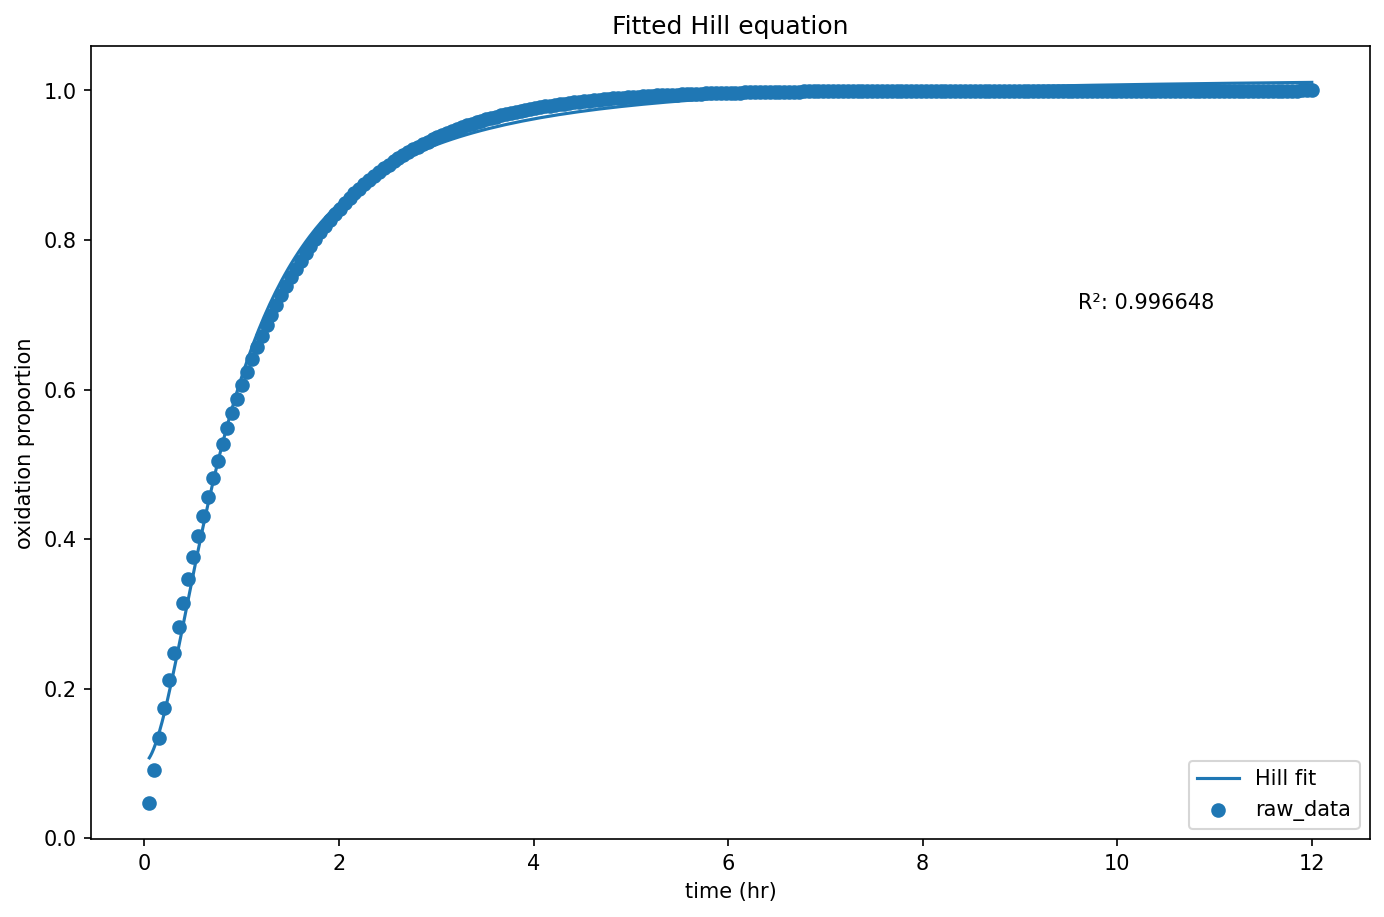

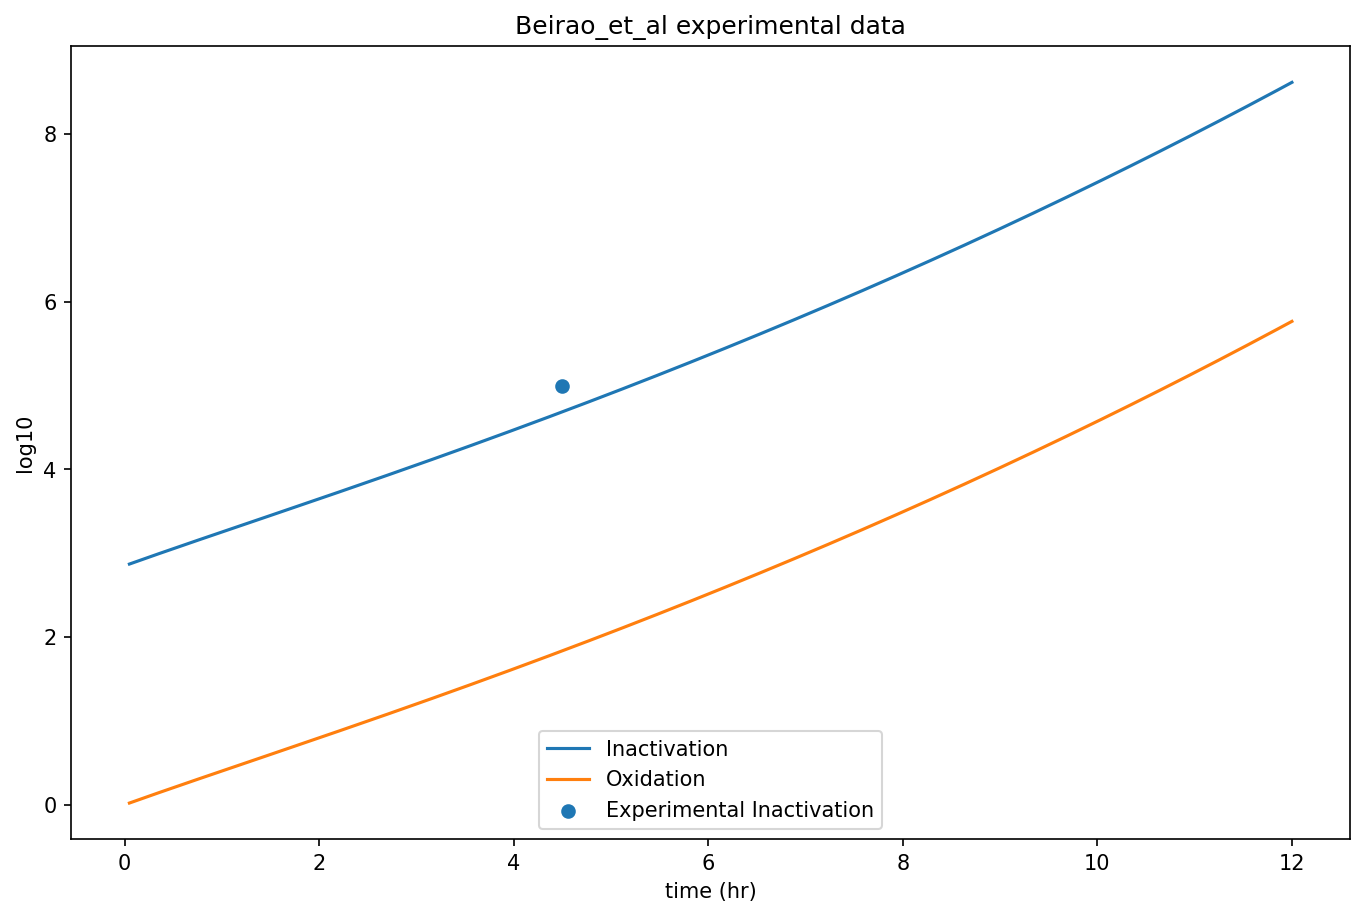

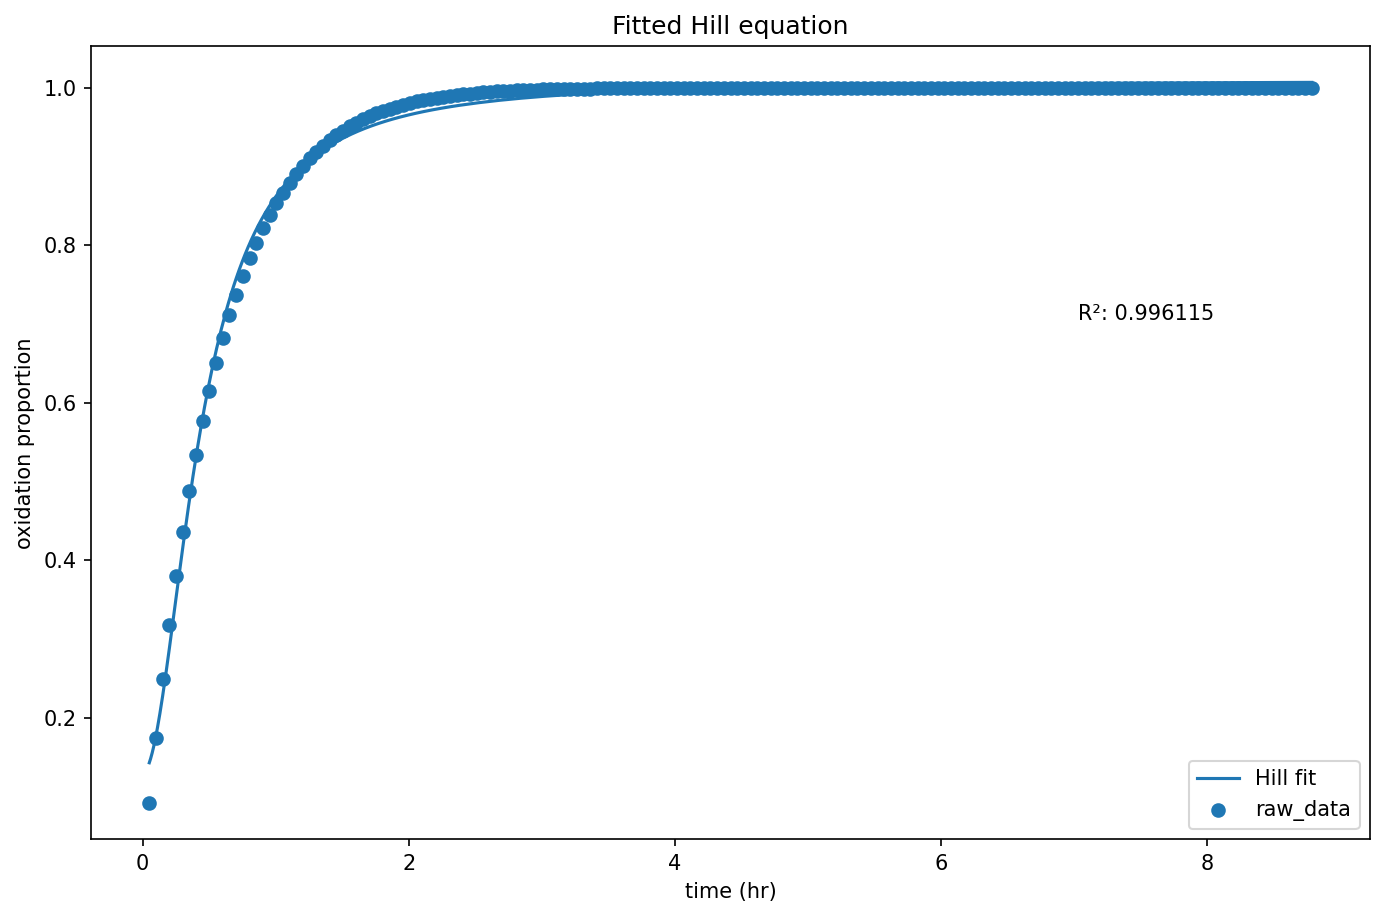

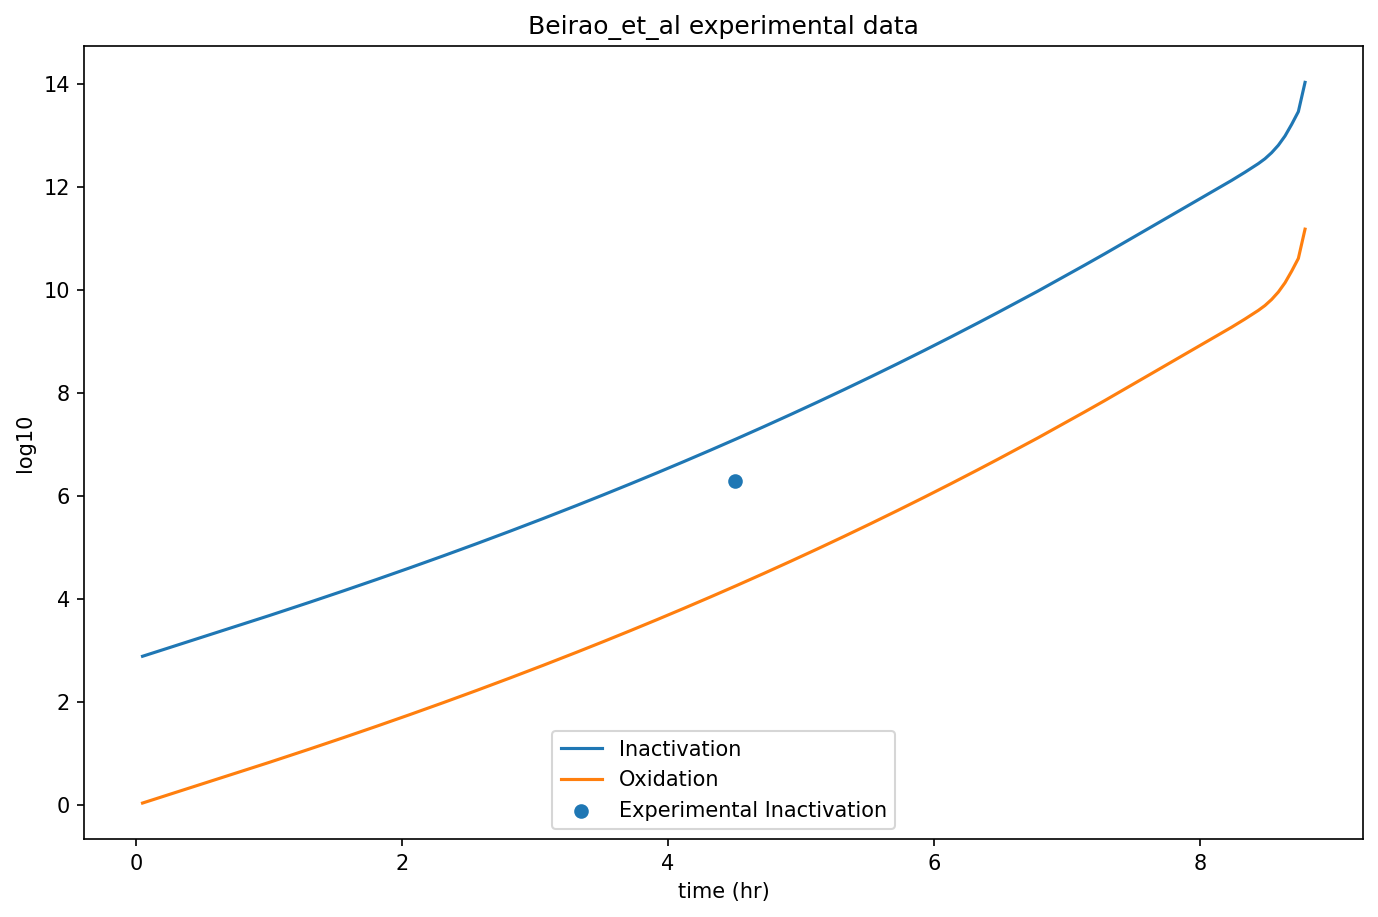

In [66]:
from uncertainties import ufloat
from math import isclose

# execute the simulation
%run ../../pdipy/pdi.py
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    # determine the experimental result
    actual_time = 4.5
    if photosensitizer_molar == 20*micro:
        actual_reduction = 6.3            
        absorbance_nm = {
            '400-430':2,
            '550-650':1
        }      
    elif photosensitizer_molar == 5*micro:
        actual_reduction = 3.6
        absorbance_nm = {
            '400-430':0.5,
            '550-650':0.25
        }
    elif photosensitizer_molar == 10*micro:
        actual_reduction = 5
        absorbance_nm = {
            '400-430':1,
            '550-650':0.5
        }
        
    # execute the simulation
    pdi = PDI(verbose = True, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = photosensitizer_characteristics,
        photosensitizer_molar = photosensitizer_molar,
        absorbance_nm = absorbance_nm,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = light_characteristics, 
        measurement = {'irradiance': 4}
    )
    pdi.simulate(
        export_name = 'Absorption data',
        figure_title = 'Beirao_et_al experimental data',
        display_fa_oxidation = True,
        experimental_data = {
            'x': [actual_time],
            'y': [actual_reduction]
        },
        export_contents = False
    )
    
    value, unit = pdi.parse_data(
        log_reduction = actual_reduction
    )            
    # calculate the %-error
    tolerance = actual_time/2
    acceptable_range_float = ufloat(actual_time, tolerance)
    if isclose(value, actual_time, abs_tol=tolerance):
        print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')
    else:
        print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')